# **Problem Statement**

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



The bank is looking for identifying customers that could show higher intent towards a recommended credit card

Bank has provided below details

**ID** --> Unique Identifier for a row

**Gender** --> Gender of the Customer

**Age** --> Age of the Customer (in Years)

**Region_Code** --> Code of the Region for the customers

**Occupation** --> Occupation Type for the customer

**Channel_Code** --> Acquisition Channel Code for the Customer place where customers meet brand for the first time

**Vintage** --> Vintage for the Customer (In Months)

**Credit_Product** -->If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

**Avg_Account_Balance** --> Average Account Balance for the Customer in last 12 Months

**Is_Active** --> If the Customer is Active in last 3 Months

**Is_Lead(Target)** --> If the Customer is interested for the Credit Card

0 : Customer is not interested

1 : Customer is interested

In [ ]:
#importing train data into dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('/content/train-file.csv')


In [ ]:
#To get the idea of how the table looks like 
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
print(train.shape)

(245725, 11)


Total number of records for training: 245725

In [ ]:
test = pd.read_csv('/content/test-file.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
print("Number of records for testing:", test.shape[0] )

Number of records for testing: 105312


Following will help in brief viewing of training data. The .info() code gives almost the entire information that needs to be inspected, so let's start from there

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


# **Exploratory Data Analysis**

Lets deep dive into data for better insights, EDA will helps to know answers of below question.

1. from Which platforms(channel_code), customer's are getting more attracted.
2. Based on average salaries , how many are revealing credit_product 
3. Occupation does matter in purchasing the product.
4. Gender and age helps in deciding interest.




In [ ]:
print(train['Gender'].value_counts())
print('*'*15)
print()
print(train['Age'].value_counts())
print('*'*15)
print()
print(train['Occupation'].value_counts())
print('*'*15)
print()
print(train['Channel_Code'].value_counts())
print('*'*15)
print()
print(train['Vintage'].value_counts())
print('*'*15)
print()
print(train['Is_Active'].value_counts())
print('*'*15)
print()
print(train['Is_Lead'].value_counts())
print('*'*15)
print()
print(train['Region_Code'].value_counts())


Male      134197
Female    111528
Name: Gender, dtype: int64
***************

28    14533
29    13284
27    13005
30    11066
26     9039
      ...  
82      749
83      694
84      624
85      604
23        1
Name: Age, Length: 63, dtype: int64
***************

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64
***************

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64
***************

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64
***************

No     150290
Yes     95435
Name: Is_Active, dtype: int64
***************

0    187437
1     58288
Name: Is_Lead, dtype: int64
***************

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     61

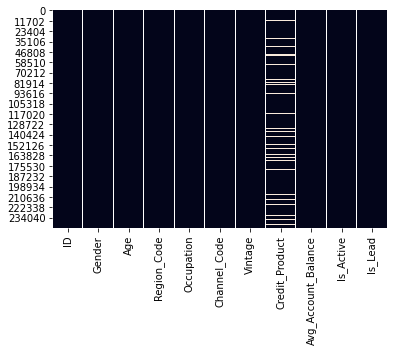

In [ ]:
#Lets Check Missing values present in data
sns.heatmap(train.isnull(), cbar=False)

In [ ]:
# Checking the percentage of missing values
round(100*(train.isnull().sum()/len(train.index)), 2)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.93
Avg_Account_Balance     0.00
Is_Active               0.00
Is_Lead                 0.00
dtype: float64

So around 11% of Credit_product is missing, We will consider this as a new feature as of now.  In Data processing will check whether it's helpful or not and accordingly take action.

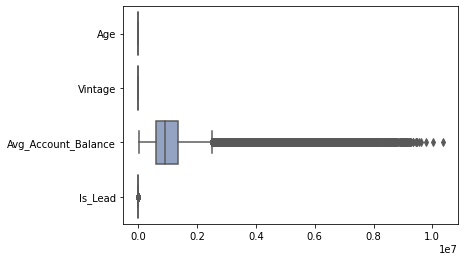

In [ ]:
# Checking of Outliers present in data
ax = sns.boxplot(data=train, orient="h", palette="Set2")

For features Avg_Account_Balance, we can see from above plot that it  has huge number of outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'Channel_Code')

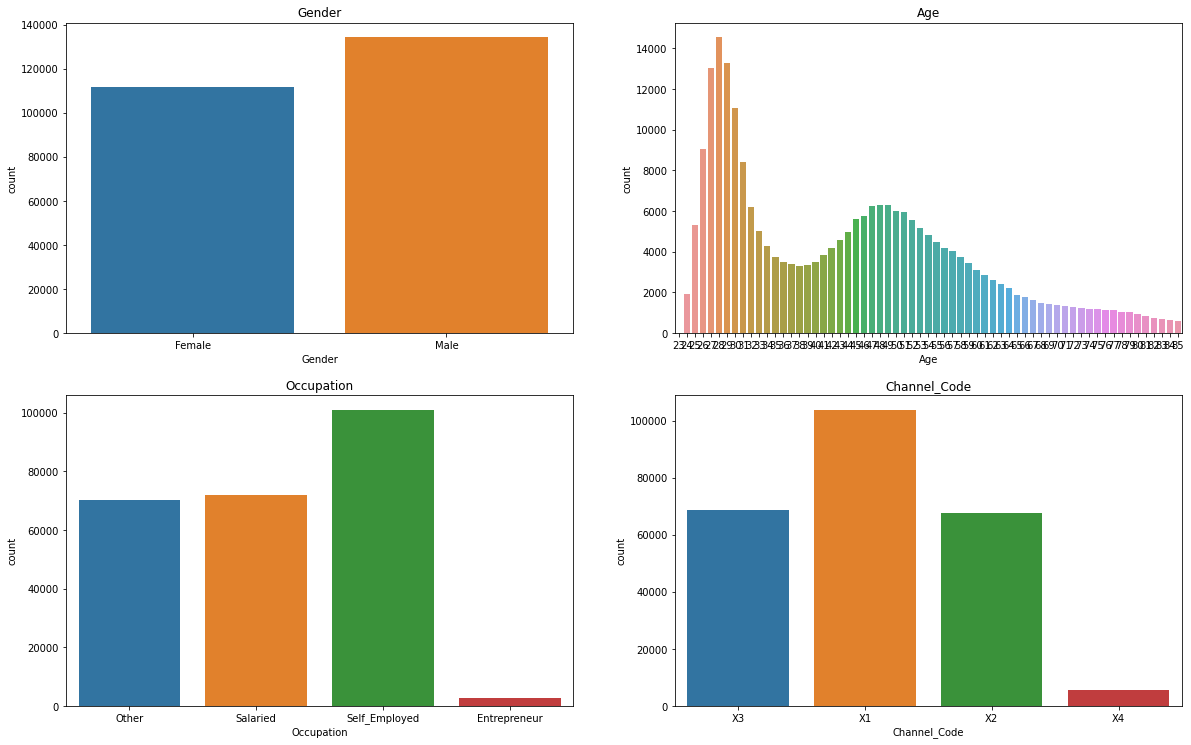

In [ ]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(train['Gender'])
plt.title('Gender')

plt.subplot(6,2,2)
sns.countplot(train['Age'])
plt.title('Age')

plt.subplot(6,2,3)
sns.countplot(train['Occupation'])
plt.title('Occupation')

plt.subplot(6,2,4)
sns.countplot(train['Channel_Code'])
plt.title('Channel_Code')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


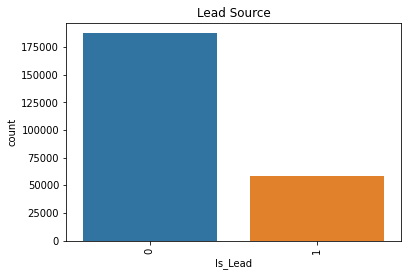

In [ ]:
sns.countplot(train['Is_Lead']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

It is understandable from the above EDA that there are few elements that have very little data and few are dominating ones

# **Train Data Preprocessing**

In [ ]:
#Drop Duplicates if present
train=train.drop_duplicates()

In [ ]:
train.shape

(245725, 11)

So there were no duplicates present in data, good to proceed ahead

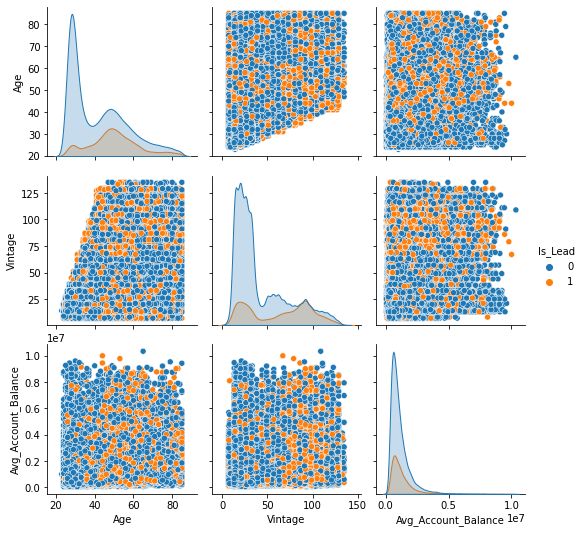

In [ ]:
sns.pairplot(train,hue="Is_Lead")

From above pair Plot, we cannot draw any colusion as not able to identify separable features for classify target variable

In [ ]:
# Converting non numeric into numeric with help of label encoding
import numpy as np

#replaced all Nan values to 5(selected random as it will not coincide with other variable)
train.replace(to_replace = np.nan, value =5, inplace =True) 

#Converting Credit Product nomumeric data into numeric by giving 0-No and 1-Yes
train['Credit_Product']=np.where(train['Credit_Product']=='No',0,train['Credit_Product'])
train['Credit_Product']=np.where(train['Credit_Product']=='Yes',1,train['Credit_Product'])

#Similarly for Is_Active Converting to numeric by giving 0-No and 1-Yes
train['Is_Active'] = train['Is_Active'].map({'Yes': 1, 'No': 0})

#Similarly for Gender to numeric by giving 0-Male and 1-Female
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})

#Similarly for Occupation to numeric 
train['Occupation'] = train['Occupation'].map({'Other': 0, 'Salaried': 1, 'Self_Employed': 2, 'Entrepreneur': 3})

#Similarly for Channel_code
train['Channel_Code'] = train['Channel_Code'].map({'X1': 0, 'X2': 1, 'X3': 2, 'X4': 3})

#we can drop Id as all other feature represent customer same way
train.drop(['ID'],axis =1, inplace = True)

In [ ]:
#Encode labels in column 'Region_Code'
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Region_Code'.
train['Region_Code']= label_encoder.fit_transform(train['Region_Code'])


In [ ]:
# IQR
Q1 = np.percentile(train['Avg_Account_Balance'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(train['Avg_Account_Balance'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", train.shape)

# Upper bound
upper = np.where(train['Avg_Account_Balance'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train['Avg_Account_Balance'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
train.drop(upper[0], inplace = True)
train.drop(lower[0], inplace = True)

print("New Shape: ", train.shape)

Old Shape:  (245725, 10)
New Shape:  (231113, 10)


# **Test Data Preprocessing**

In [ ]:
#same as train data preprocessing
test.replace(to_replace = np.nan, value =5, inplace =True)
test['Credit_Product']=np.where(test['Credit_Product']=='No',0,test['Credit_Product'])
test['Credit_Product']=np.where(test['Credit_Product']=='Yes',1,test['Credit_Product'])

test['Channel_Code'] = test['Channel_Code'].map({'X1': 0, 'X2': 1, 'X3': 2, 'X4': 3})

test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})

test['Occupation'] = test['Occupation'].map({'Other': 0, 'Salaried': 1, 'Self_Employed': 2, 'Entrepreneur': 3})
test['Is_Active'] = test['Is_Active'].map({'Yes': 1, 'No': 0})

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Region_Code'.
test['Region_Code']= label_encoder.fit_transform(test['Region_Code'])

In [ ]:
# from sklearn import preprocessing

# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in column 'Avg_Account_Balance'.
# test['Avg_Account_Balance']= label_encoder.fit_transform(test['Avg_Account_Balance'])

# **Train Test Data Split**

In [ ]:
# Import the required library
from sklearn.model_selection import train_test_split
X = train.drop(['Is_Lead'], 1)
y = train['Is_Lead']

In [ ]:
# Split the dataset into 70% and 30% for train and test respectively(taken with imp features)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

# **Feature Selection**

In [ ]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

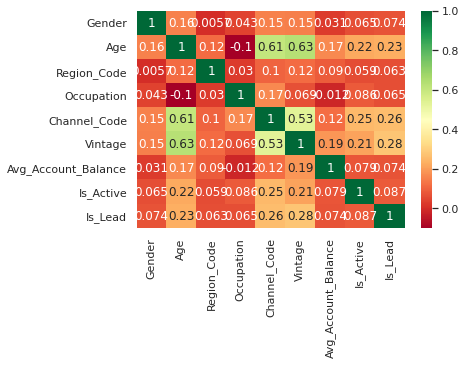

In [ ]:
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clf_rf.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
auc

0.5576208889149588

In [ ]:
#Feature selection with RFE
from sklearn.feature_selection import RFE
rfe = RFE(clf_rf,6)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', False, 3),
 ('Age', True, 1),
 ('Region_Code', True, 1),
 ('Occupation', False, 2),
 ('Channel_Code', True, 1),
 ('Vintage', True, 1),
 ('Credit_Product', True, 1),
 ('Avg_Account_Balance', True, 1),
 ('Is_Active', False, 4)]

In [ ]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [ ]:
# Selecting columns selected by RFE
X_train1 = X_train[col]

In [ ]:
X_test1 = X_test[col]

# **Model Building**

In [ ]:
#training model with important features
clf_rf.fit(X_train1, y_train)

In [ ]:
y_pred = clf_rf.predict(X_test1)


In [ ]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7398941945825465

# **Hyper parameter Tuning**

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [100,500,900]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [10,15,20]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid,scoring='accuracy', n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train1,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=  15.5s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=  15.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=  15.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=  15.6s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=  15.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=  11.3s
[CV] n_estimators=100, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 14.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
y_pred = rf_random.predict(X_test1)

In [ ]:
auc = roc_auc_score(y_test, y_pred)
auc

0.736013660116681

# **Model With ANN Classification**

In [ ]:
#converting to scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
classifier = Sequential()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
#Initializing Neural Network
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
Model = Sequential()
Model.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
# Adding the second hidden layer
Model.add(Dense(48, kernel_initializer = 'uniform', activation = 'relu'))
Model.add(Dense(48, kernel_initializer = 'uniform', activation = 'relu'))
Model.add(Dense(48, kernel_initializer = 'uniform', activation = 'relu'))
Model.add(Dense(32, kernel_initializer = 'uniform', activation = 'tanh'))
Model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
Model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling Neural Network
Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['AUC'],)
#fitting the neural Network
Model.fit(X_train, y_train, batch_size =48, epochs = 30)

Epoch 1/30
3371/3371 [==============================] - 25s 2ms/step - loss: 0.3933 - auc: 0.8281
Epoch 2/30
3371/3371 [==============================] - 8s 2ms/step - loss: 0.3623 - auc: 0.8595
Epoch 3/30
3371/3371 [==============================] - 8s 2ms/step - loss: 0.3510 - auc: 0.8662
Epoch 4/30
3371/3371 [==============================] - 8s 2ms/step - loss: 0.3475 - auc: 0.8696
Epoch 5/30
3371/3371 [==============================] - 8s 2ms/step - loss: 0.3463 - auc: 0.8694
Epoch 6/30
3371/3371 [==============================] - 8s 2ms/step - loss: 0.3462 - auc: 0.8682
Epoch 7/30
3371/3371 [==============================] - 8s 2ms/step - loss: 0.3463 - auc: 0.8686
Epoch 8/30
3371/3371 [==============================] - 8s 2ms/step - loss: 0.3451 - auc: 0.8706
Epoch 9/30
3371/3371 [==============================] - 8s 2ms/step - loss: 0.3434 - auc: 0.8733
Epoch 10/30
3371/3371 [==============================] - 8s 2ms/step - loss: 0.3439 - auc: 0.8724
Epoch 11/30
3371/3371 [=====

In [ ]:
Y_prediction=Model.predict(X_test)
# Area Under Curve
auc = roc_auc_score(y_test, Y_prediction)
auc

0.8731787157141072

Converting to Scaler the testing data

In [ ]:
ID=test['ID']
test.drop(['ID'], axis =1, inplace =True)
testing = sc.fit_transform(test)

Generating the submission file

In [ ]:
y_pred = Model.predict(testing)
y_pred = (y_pred > 0.25)
submission_df = pd.DataFrame({'ID': ID,'Is_Lead': y_pred.flatten().astype(int),
})
submission_df.set_index('ID', inplace=True)
submission_df.to_csv('final_submission01.csv')